# DATA DESCRIPTION:

The dataset contains eight attributes (or features) and two responses (or outcomes). The aim is to use the eight features to predict each of the two responses.

## Features:

  1. X1 Relative Compactness
  2. X2 Surface Area
  3. X3 Wall Area
  4. X4 Roof Area
  5. X5 Overall Height
  6. X6 Orientation
  7. X7 Glazing Area
  8. X8 Glazing Area Distribution

## Predict:
  1. y1 Heating Load
  2. y2 Cooling Load

### IMPORTING LIBRARIES:

In [1]:
# DATA HANDLING:
import pandas as pd
import numpy as np

# VISUALISATION:
import matplotlib.pyplot as plt
import seaborn as sns

#  STANDARIZING
from sklearn.preprocessing import StandardScaler

# METRICS
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    max_error)

# MODEL
from sklearn.model_selection import (
    train_test_split,
    cross_val_score)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor)

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# FEATURE ENGINEERING:
from sklearn.feature_selection import (
    SelectKBest,
    f_classif)

In [2]:
# FUNTION:

def missing_values_calculator(data):
    '''CALCULATING THE MISSING VALUES, AND DATA TYPE'''
    null_values = data.isna().sum().sort_values(ascending=False)
    per_values = data.isna().mean().sort_values(ascending=False)
    names = null_values.index
    data_type = data[names].dtypes
    information = pd.DataFrame({'NAMES': names,
                        'NULL VALUE COUNT': null_values,
                        'NULL VALUES IN PERCENTAGES (%)': per_values,
                        'DATA TYPE': data_type})
    information = information.reset_index(drop=True)
    return information

def name_formatting(data):
    '''REMOVE ALL THE SPACES AND PUT THE NAMES OF THE FEATURES AND TARGETS'''
    # DICTIONARY WITH THE NAMES
    labels = {'X1' : 'Relative Compactness',
          'X2' : 'Surface Area',
          'X3' : 'Wall Area',
          'X4' : 'Roof Area',
          'X5' : 'Overall Height',
          'X6' : 'Orientation',
          'X7' : 'Glazing Area',
          'X8' : 'Glazing Area Distribution',
          'Y1': 'Heating Load (TARGET 1)',
          'Y2': 'Cooling Load (TARGET 2)'}
    # NAME CHANGING
    for name in labels:
        if(' ' in labels[name]):
            new_name = labels[name].replace(' ', '_')
        else:
            new_name = labels[name]
        data = data.rename(columns={name:new_name})
    return data


def train_test_pred(X_train, y_train, X_test, y_test):
    '''THIS FUNCTION WILL TRAIN AND PREDICT. IT WILL RETURN:
    1. PERFORMANCE
    2. RANKING
    3. BEST MODEL
    4. NAME OF THE BEST MODEL'''
    # STORING THE MODELS INTO A DICTIONARY:
    models = {
        'Linear Regression'             :            LinearRegression(),
        'Decision Tree Regressor'       :       DecisionTreeRegressor(),
        'Random Forest Regressor'       :      RandomForestRegressor(),
        'Gradient Boosting Regressor'   :  GradientBoostingRegressor(),
        'K Neighbors Regressor'         :        KNeighborsRegressor(),
        'Gradient Boosting Regressor'   :   GradientBoostingRegressor()
        }

    performance = {}# Dictionary to store performance metrics for each model

    # MODEL TRIANING AND PREDICTING:
    for model_name, model in models.items():

        # PERFORM CROSS-VALIDATION:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

        # TRAINING (FITTING) THE MODEL
        model.fit(X_train, y_train)

        # MAKING PREDICTION
        y_pred  = model.predict(X_test)

        # CALCULATING THE PERFORMANCE METRICS:
        mse     = mean_squared_error(y_test, y_pred)
        # mae     = mean_absolute_error(y_test, y_pred)
        r2      = r2_score(y_test, y_pred)
        rmse    = np.sqrt(mse)
        # max_err = max_error(y_test, y_pred)

        # STORING THE PERFORMANCES METRICS:(dict inside another dict):
        performance[model_name] = {
        # 'MSE'       : mse,
        'R-squared' : r2,
        # 'MAE'       : mae,
        'RMSE'      : rmse,
        # 'MAX ERROR' : max_err,
        }

    # NORMALISING THE METRICS TO RANK THE MODELS WITH BETTER PERFORMANCES:
    normalised_performance  = {}

    for normalised, metrics in performance.items():
        # NORMALISING METRIC RESULTS:
        # normalized_mse          = 1 - metrics["MSE"] / np.max([metrics["MSE"] for metrics in performance.values()])
        normalized_r_squared    = metrics["R-squared"] / np.max([metrics["R-squared"] for metrics in performance.values()])
        # normalized_mae          = 1 - metrics["MAE"] / np.max([metrics["MAE"] for metrics in performance.values()])
        normalized_rmse         = 1 - metrics["RMSE"] / np.max([metrics["RMSE"] for metrics in performance.values()])

        # CALCULATING THE AGGREGATED SCORE PER MODEL
        # aggregated_score        = (normalized_mse + normalized_r_squared + normalized_mae + normalized_rmse)/4
        aggregated_score        = (normalized_r_squared + normalized_rmse)/2

        # STORING THE AGGREGATION (SCORE) PER MODEL:
        normalised_performance[normalised] =  aggregated_score

    # STORING THE SORTED MODELS INTO A LIST
    ranked_models = sorted(normalised_performance, key=normalised_performance.get, reverse=True)

    # STORING THE VALUES INTO A DICTIONARY
    model_aggregated_scores = {}
    for model in ranked_models:
        model_aggregated_scores[model] = normalised_performance[model]

    # PICKING THE BEST MODEL
    best_model_name = ranked_models[0]
    best_model = models[best_model_name]

    # RETURNING THE DATA FRAME OF MODELS AND A SERIES WITH THE RANKS IN A TUPLE
    return pd.DataFrame(performance), pd.Series(model_aggregated_scores), best_model, best_model_name


In [3]:
# IMPORTING DATA:
df = pd.read_csv(r'/content/drive/MyDrive/Documentos/UK Master/2023SEM2_LD7182FLZ01 : Artificial Intelligence for Internet of Things (IoT)/Assignment/Code/Data/ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
# FORMATTING THE FEATURES AND TARGET'S NAME:
df_copy = name_formatting(df) # copy of the dataframe\
df_copy.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load_(TARGET_1),Cooling_Load_(TARGET_2)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
# CHECKING THE SHAPE:
shape = pd.Series({'NAME':'DESCRIPTION',
                   'No. Rows': df_copy.shape[0],
                   'No. Columns': df_copy.shape[1]})
shape

NAME           DESCRIPTION
No. Rows               768
No. Columns             10
dtype: object

In [6]:
# CHEKCING THE NULL VALUES:
missing_values_calculator(df_copy)

,NAMES,NULL VALUE COUNT,NULL VALUES IN PERCENTAGES (%),DATA TYPE
0,Relative_Compactness,0,0.0,float64
1,Surface_Area,0,0.0,float64
2,Wall_Area,0,0.0,float64
3,Roof_Area,0,0.0,float64
4,Overall_Height,0,0.0,float64
5,Orientation,0,0.0,int64
6,Glazing_Area,0,0.0,float64
7,Glazing_Area_Distribution,0,0.0,int64
8,Heating_Load_(TARGET_1),0,0.0,float64
9,Cooling_Load_(TARGET_2),0,0.0,float64


In [7]:
# WE CAN CHECK THE DESCRIBE TO CHECK OUTLIERS, BUT I WILL CHECK THAT WITH BOXPLOTS AS WELL

# CORRELATION:

Let's visualise the correlation that each variable with the targets. Let's check a correlation matrix

In [8]:
correlation = df_copy.corr()
correlation

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load_(TARGET_1),Cooling_Load_(TARGET_2)
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load_(TARGET_1),6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling_Load_(TARGET_2),6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


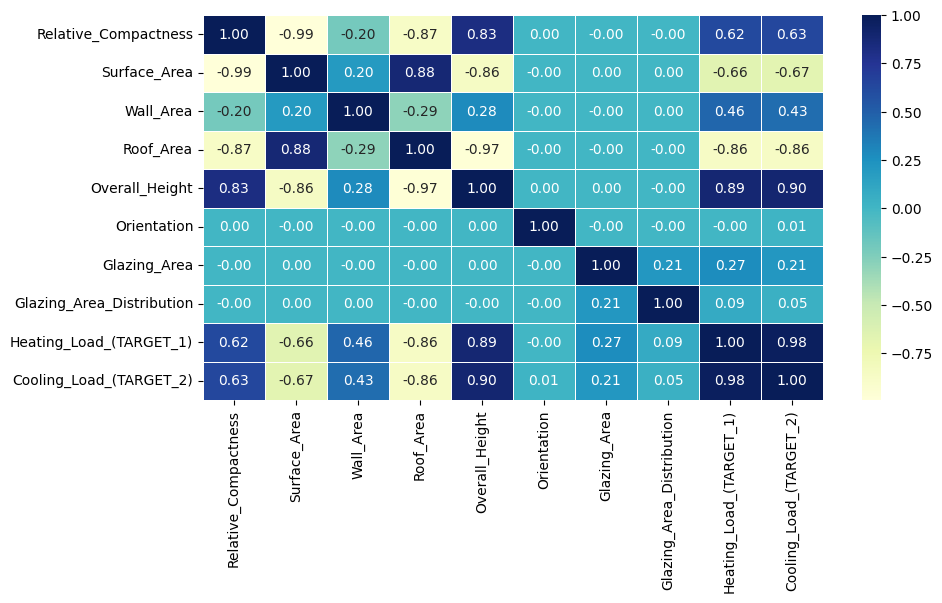

In [9]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.heatmap(df_copy.corr(), annot = True,  linewidths = 0.5,  fmt = ".2f",  cmap = "YlGnBu");
# PENDING TO CHECK THE XTICKS ROTATION

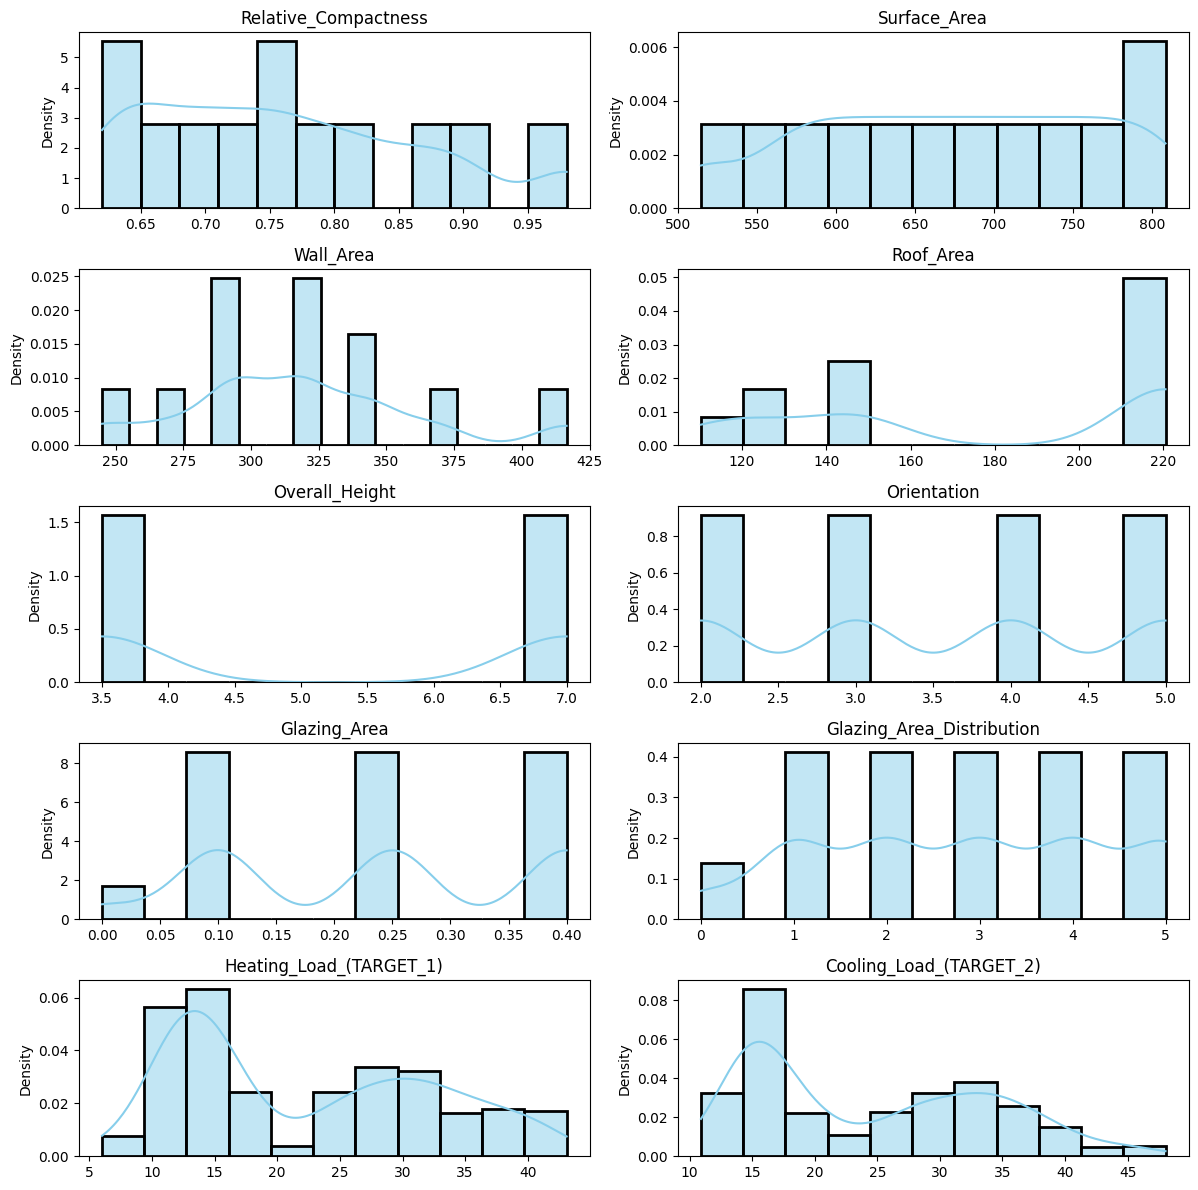

In [10]:
# Plot histograms for each feature
fig, axes = plt.subplots(5, 2, figsize=(12, 12))  # Create a 5x2 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier indexing

for i, column in enumerate(df_copy.columns):
    sns.histplot(df_copy[column], ax=axes[i], kde=True, stat='density', color='skyblue', linewidth=2)
    axes[i].set_title(column)  # Set the title of each subplot to the feature name
    axes[i].set_xlabel('')  # Remove x-axis label for better readability

plt.tight_layout()  # Adjust the layout to prevent overlap of subplots


This is showing us that the distribution is not normal

# SPLITTING THE DATA:

### PROCEDURE: Splitting the data into:
  1. Training set.(80%)
  2. Validation set.(20% out of the training set)
  3. Testing set (unseen data 20% from the total)

Reserved Variable to test the trained model:

X_Heating_test, y_Heating_test


# HEATING LOAD:

In [11]:
# FEATURE SPLITTING Xs FOR HEATING:
X_Heating = df_copy.drop(columns=['Heating_Load_(TARGET_1)'])
# TARGETS FOR HEATING:
y_Heating = df_copy['Heating_Load_(TARGET_1)']

# SEED FOR REPRODUCIBILITY
np.random.seed(47)

# SPLIT FOR HEATING LOAD (HERE WE HAVE THE TESTING SET OR UNSEEN DATA):
X_Heating_train, X_Heating_test,        y_Heating_train, y_Heating_test       = train_test_split(X_Heating, y_Heating, test_size=0.20, random_state=47)
X_Heating_train, X_Heating_validation,  y_Heating_train, y_Heating_validation = train_test_split(X_Heating_train, y_Heating_train, test_size=0.20, random_state=47)

print(f'TESTING SET:    X shape: {X_Heating_test.shape},        y shape: {y_Heating_test.shape}')
print(f'TRAINING SET:   X shape: {X_Heating_train.shape},       y shape: {y_Heating_train.shape}')
print(f'VALIDATION SET: X shape: {X_Heating_validation.shape},  y shape: {y_Heating_validation.shape}')

TESTING SET:    X shape: (154, 9),        y shape: (154,)
TRAINING SET:   X shape: (491, 9),       y shape: (491,)
VALIDATION SET: X shape: (123, 9),  y shape: (123,)


# COOLING LOAD

In [12]:
# FEATURE SPLITTING Xs FOR COOLING:
X_Cooling = df_copy.drop(columns=['Cooling_Load_(TARGET_2)'])
# TARGETS FOR COOLING:
y_Cooling = df_copy['Cooling_Load_(TARGET_2)']

# SEED FOR REPRODUCIBILITY
np.random.seed(47)

# # SPLIT FOR COOLING LOAD:
X_Cooling_train, X_Cooling_test,        y_Cooling_train, y_Cooling_test       = train_test_split(X_Cooling, y_Cooling, test_size=0.20, random_state=47)
X_Cooling_train, X_Cooling_validation,  y_Cooling_train, y_Cooling_validation = train_test_split(X_Cooling_train, y_Cooling_train, test_size=0.20, random_state=47)

print(f'TESTING SET:    X shape: {X_Cooling_test.shape},        y shape: {y_Cooling_test.shape}')
print(f'TRAINING SET:   X shape: {X_Cooling_train.shape},       y shape: {y_Cooling_train.shape}')
print(f'VALIDATION SET: X shape: {X_Cooling_validation.shape},  y shape: {y_Cooling_validation.shape}')

TESTING SET:    X shape: (154, 9),        y shape: (154,)
TRAINING SET:   X shape: (491, 9),       y shape: (491,)
VALIDATION SET: X shape: (123, 9),  y shape: (123,)


# STANDARINSING (SCALING) THE DATA:

In [13]:
# CREATING THE INSTANSE OF THE STANDARISER:
scaler_heating = StandardScaler()
scaler_cooling = StandardScaler()

# STANDARINSING HEATING
X_Heating_train_scaled      = scaler_heating.fit_transform(X_Heating_train)
X_Heating_validation_scaled = scaler_heating.fit_transform(X_Heating_validation)
X_Heating_test_scaled       = scaler_heating.transform(X_Heating_test)            # unseen data

# STANDARINSING COOLING
X_Cooling_train_scaled      = scaler_cooling.fit_transform(X_Cooling_train)
X_Cooling_validation_scaled = scaler_cooling.fit_transform(X_Cooling_validation)
X_Cooling_test_scaled       = scaler_cooling.transform(X_Cooling_test)            # unseen data

# FEATURE SELECTION:

In [14]:
# INSTANTIATING THE OBJECT
selector_heating = SelectKBest(score_func = f_classif, k=5)
selector_cooling = SelectKBest(score_func = f_classif, k=5)

# SELECTED FEATURES HEATING SYSTEM
X_Heating_train_selected      = selector_heating.fit_transform(X_Heating_train_scaled, y_Heating_train)
X_Heating_validation_selected = selector_heating.transform(X_Heating_validation_scaled)
X_Heating_test_selected       = selector_heating.transform(X_Heating_test_scaled)                       # unseen data

# SELECTED FEATURES COOLING SYSTEM
X_Cooling_train_selected      = selector_cooling.fit_transform(X_Cooling_train_scaled, y_Cooling_train)
X_Cooling_validation_selected = selector_cooling.transform(X_Cooling_validation_scaled)
X_Cooling_test_selected       = selector_cooling.transform(X_Cooling_test_scaled)                       # unseen data

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


# AFTER THE FEATURE SELECTION, THESE ARE THE FEATURES SELECTED PER TARGET:

In [15]:
# GETTING INDEXES OF SELECTED FEATURES FOR HEATING LOAD:
selected_feature_indices_heating = selector_heating.get_support()
selected_feature_indices_cooling = selector_cooling.get_support()

# GETTING THE NAMES OF THE SELECTED FEATURES:
selected_feature_names_heating = X_Heating_train.columns[selected_feature_indices_heating]
selected_feature_names_cooling = X_Cooling_train.columns[selected_feature_indices_cooling]

# PRINT THE HEATING LOAD:
print('SELECTED FEATURES FOR HEATING LOAD:\n')
for i, feature in enumerate(selected_feature_names_heating):
    print(f'{i+1}. {feature}')

# PRINT THE COOLING LOAD:
print('\nSELECTED FEATURES FOR COOLING LOAD:\n')
for j, feature in enumerate(selected_feature_names_cooling):
    print(f'{j+1}. {feature}')

SELECTED FEATURES FOR HEATING LOAD:

1. Relative_Compactness
2. Surface_Area
3. Roof_Area
4. Overall_Height
5. Cooling_Load_(TARGET_2)

SELECTED FEATURES FOR COOLING LOAD:

1. Relative_Compactness
2. Surface_Area
3. Roof_Area
4. Overall_Height
5. Heating_Load_(TARGET_1)


# END OF PREPROCESSING THE DATA
# TRAINING THE MODELS AND GETTING THE PERFORMANCE EVALUATIONS:

This function will return 4 results:

  1. Performance table
  2. Model raking
  3. Best model for testing on the unseen data
  4. Name of the model

We are doing this for both targets.

In [16]:
# TRAINING THE MODELS FOR THE SELECTED FEATURES FOR HEATING LOAD:
tests_results_heating = train_test_pred(X_Heating_train_selected, y_Heating_train,
                                        X_Heating_validation_selected, y_Heating_validation)

# TRAINING THE MODELS FOR THE SELECTED FEATURES FOR COOLING LOAD:
tests_results_cooling = train_test_pred(X_Cooling_train_selected, y_Cooling_train,
                                        X_Cooling_validation_selected, y_Cooling_validation)

# ***HEATING LOAD METRIC*** EVALUATION SUMMARY:

In [17]:
tests_results_heating[0]

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor,K Neighbors Regressor
R-squared,0.946288,0.951156,0.963106,0.967615,0.968553
RMSE,2.198237,2.096258,1.821867,1.706913,1.682011


# MODEL SELECTION - RANKING FOR ***HEATING LOAD***:

In [18]:
tests_results_heating[1]

K Neighbors Regressor          0.617418
Gradient Boosting Regressor    0.611270
Random Forest Regressor        0.582795
Decision Tree Regressor        0.514215
Linear Regression              0.488506
dtype: float64

# ***COOLING LOAD METRIC*** EVALUATION SUMMARY:

In [19]:
tests_results_cooling[0]

,Linear Regression,Decision Tree Regressor,Random Forest Regressor,Gradient Boosting Regressor,K Neighbors Regressor
R-squared,0.944037,0.936207,0.955035,0.955960,0.966454
RMSE,2.173572,2.320654,1.948324,1.928173,1.682849


# MODEL SELECTION - RANKING FOR ***COOLING LOAD***:

In [20]:
tests_results_cooling[1]

K Neighbors Regressor          0.637419
Gradient Boosting Regressor    0.579134
Random Forest Regressor        0.574313
Linear Regression              0.520092
Decision Tree Regressor        0.484352
dtype: float64

As we can see in the rankings for both COOLING and HEATING LOAD, the models provided a similar precision, being K Neighbors Regressor slightly higher.

In the table, for the case of HEATING LOAD, it showcases that the coefficient of determination R2 has a score of 0.968 (96.8%). This number represents the model's precision which is the higher compared to the other models and a Root mean squared error (RMSE) of 1.6 which is the lowest compared to the other models as well.

On the other hand, similar results are shown for the COOLING LOAD. R2 metric reflects a 0.966 (96.6%) and RMSE of 1.6.

In the next steps, the trained model will be tested on the unseen data (Test set) to make predictions:

In [21]:
# TESTING THE MODEL ON UNSEEN DATA:
test_accuracy_heating = tests_results_heating[2]
model_name_heating    = tests_results_heating[3]
result_heating        = np.around(test_accuracy_heating.score(X_Heating_test_selected, y_Heating_test)*100, 2)

print(f'For the HEATING LOAD the best model was {model_name_heating}:')
print(f'The reached accuracy was {result_heating}%')

For the HEATING LOAD the best model was K Neighbors Regressor:
The reached accuracy was 97.16%


In [22]:
# TESTING THE MODEL ON UNSEEN DATA:
test_accuracy_cooling = tests_results_cooling[2]
model_name_cooling    = tests_results_cooling[3]
result_cooling        = np.around(test_accuracy_cooling.score(X_Cooling_test_selected, y_Cooling_test)*100, 2)

print(f'For the COOLING LOAD the best model was {model_name_cooling}:')
print(f'The reached accuracy was {result_cooling}%')

For the COOLING LOAD the best model was K Neighbors Regressor:
The reached accuracy was 96.76%
